# **0.Hope to Skills - Free AI Course**
This note book cover the following concepts

1. Pandas
2. Data Exploration
3. IQR
4. Correlation
5. Visualization

## **1.0. Importing the installed Libraries**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)



---



## **1.2. Loading the dataset**

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [28]:
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [29]:
df.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



## **1.3. Checking the types of data**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [30]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object



---



## **1.4. Dropping irrelevant columns**

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [31]:
df = df.drop([ 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Convertible,28,18,3916,34500




---



## **1.5. Renaming the columns**

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [32]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Convertible,28,18,3916,34500




---



## **1.6. Dropping the duplicate rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [33]:
df.shape

(11914, 15)

In [34]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (726, 15)


Now let us remove the duplicate data because it's ok to remove them.

## **1.7. Counting the number of Rows**

In [35]:
df.count()      # Used to count the number of rows

Make                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
Number of Doors     11908
Market Category      8172
Vehicle Style       11914
MPG-H               11914
MPG-C               11914
Popularity          11914
Price               11914
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

## **1.8. Dropping the Duplicate Values**

In [36]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Convertible,28,18,3916,34500


In [37]:
df.count()

Make                11188
Model               11188
Year                11188
Engine Fuel Type    11185
HP                  11119
Cylinders           11158
Transmission        11188
Drive Mode          11188
Number of Doors     11182
Market Category      7823
Vehicle Style       11188
MPG-H               11188
MPG-C               11188
Popularity          11188
Price               11188
dtype: int64



---



## **2.0. Dropping the missing or null values.**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [38]:
print(df.isnull().sum())

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Number of Doors        6
Market Category     3365
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [39]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make                7735
Model               7735
Year                7735
Engine Fuel Type    7735
HP                  7735
Cylinders           7735
Transmission        7735
Drive Mode          7735
Number of Doors     7735
Market Category     7735
Vehicle Style       7735
MPG-H               7735
MPG-C               7735
Popularity          7735
Price               7735
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [40]:
print(df.isnull().sum())   # After dropping the values

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Market Category     0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64




---



## **3.0. Detecting Outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<Axes: xlabel='Price'>

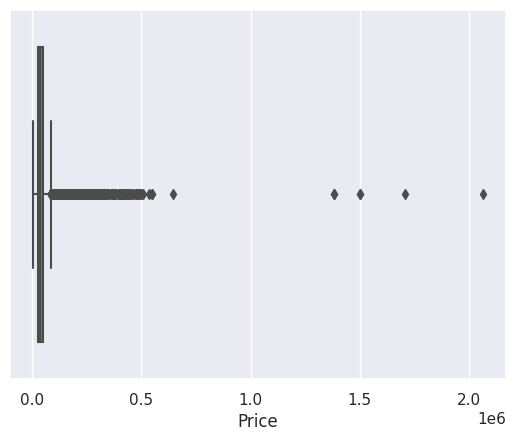

In [41]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

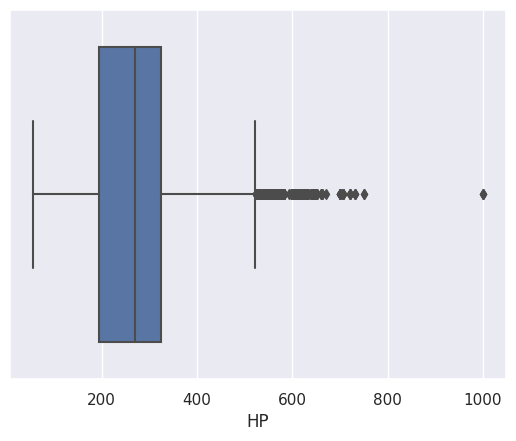

In [42]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

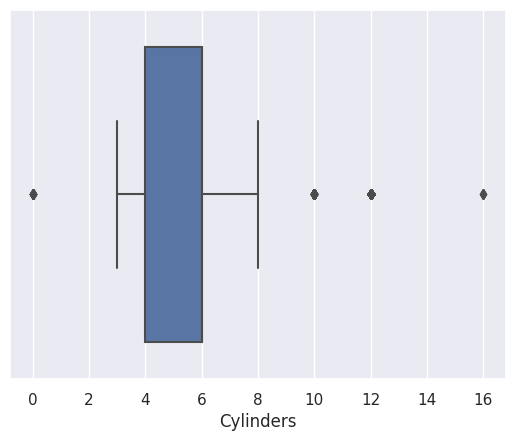

In [43]:
sns.boxplot(x=df['Cylinders'])

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


<ipython-input-44-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-44-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


## **4.0. Correlation of different features**

In [45]:
df.corr()

<ipython-input-45-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.234461,-0.051369,0.189846,0.219893,0.183083,0.126803,0.125162
HP,0.234461,1.000000,0.811138,-0.212644,-0.468328,-0.510151,0.036553,0.655522
Cylinders,-0.051369,0.811138,1.000000,-0.192441,-0.597864,-0.613399,0.010051,0.589557
Number of Doors,0.189846,-0.212644,-0.192441,1.000000,0.114555,0.150835,-0.042345,-0.193079
MPG-H,0.219893,-0.468328,-0.597864,0.114555,1.000000,0.818331,0.033672,-0.255595
MPG-C,0.183083,-0.510151,-0.613399,0.150835,0.818331,1.000000,0.036893,-0.266632
Popularity,0.126803,0.036553,0.010051,-0.042345,0.033672,0.036893,1.000000,-0.054615
Price,0.125162,0.655522,0.589557,-0.193079,-0.255595,-0.266632,-0.054615,1.000000


## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

## **Price vs Make**

In [ ]:
df.Make.value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("Price of cars by make")
plt.ylabel('price of cars')
plt.xlabel('Make');

## **Number of Cars vs Make**

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

## **Data vs the Year**

In [ ]:
df.Year.value_counts().plot(kind='pie')
plt.show()

In [ ]:
df

In [ ]:
df.Make.value_counts().nlargest(20).plot(kind='bar', figsize=(15, 10)) # figsize=(15, 10)
plt.title("Number of HP by car")
plt.ylabel('Number of HP')
plt.xlabel('Make');

## **5.0. Heat Maps**

<ipython-input-46-62a24b98640b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

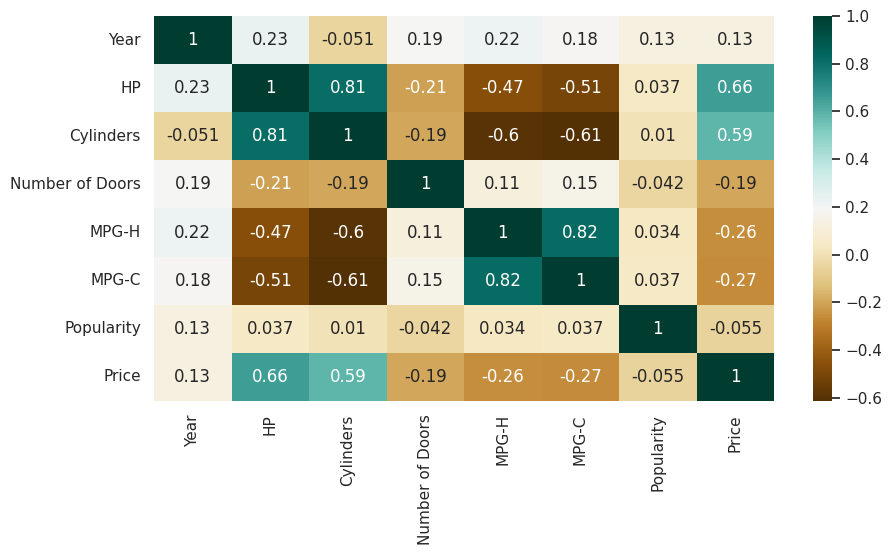

In [46]:
# Adjusting the Size of Figure
plt.figure(figsize=(10,5))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation